In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [19]:
screen_width = 1920
screen_height = 1080

num_checker_ver = 5
num_checker_hor = 9

margin_rate = 0.1

checker_size_pix = math.floor(min(
    screen_height * 0.9 / num_checker_ver,
    screen_width  * 0.9 / num_checker_hor
))

margin_top   = int((screen_height - checker_size_pix * num_checker_ver) / 2)
margin_botom = screen_height - margin_top - checker_size_pix * num_checker_ver
margin_left  = int((screen_width  - checker_size_pix * num_checker_hor) / 2)
margin_right = screen_width - margin_left - checker_size_pix * num_checker_hor

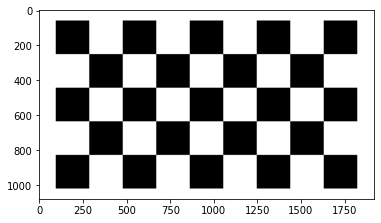

In [43]:
checker_seed = np.zeros((num_checker_ver, num_checker_hor), dtype=np.uint8)
checker_seed[1::2,  ::2] = 255
checker_seed[ ::2, 1::2] = 255

checker = np.dstack((
    np.kron(checker_seed, np.ones((checker_size_pix, checker_size_pix))),
    np.kron(checker_seed, np.ones((checker_size_pix, checker_size_pix))),
    np.kron(checker_seed, np.ones((checker_size_pix, checker_size_pix)))
))


checker_image = np.ones((screen_height, screen_width, 3), dtype=np.uint8) * 255
checker_image[
    margin_top:screen_height - margin_botom,
    margin_left:screen_width -  margin_right,
    :    
] = checker

plt.imshow(checker_image)
plt.show()

(1080, 1920, 3)
uint8
192
60 96


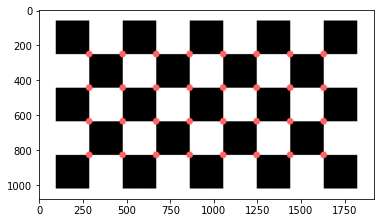

In [44]:
# verify

print(checker_image.shape)
print(checker_image.dtype)

print(checker_size_pix)
print(margin_top, margin_left)

ret, corners = cv2.findChessboardCorners(
    checker_image,
    (num_checker_hor - 1, num_checker_ver - 1),
    flags = cv2.CALIB_CB_ADAPTIVE_THRESH +
        cv2.CALIB_CB_FAST_CHECK +
        cv2.CALIB_CB_NORMALIZE_IMAGE
)

for corner in corners :
    vis_iamge = cv2.circle(
        checker_image,
        (int(corner[0][0]), int(corner[0][1])),
        screen_width // 100,
        (255, 100, 100),
        -1
    )

plt.imshow(vis_iamge)
plt.show()